In [3]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
World Development Indicators</p><br><br>
# Exploring Data Visualization Using Matplotlib

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [4]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [5]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


Looks like it has different indicators for different countries with the year and value of the indicator. 

We already saw how the USA's per-capita CO2 production related to other countries, let's see if we can find some more indicators in common between countries.  

To have some fun, we've picked countries randomly but then stored our random results so you can rerun it with the same answers.

In [6]:
# Filter 1

# Picks years of choice
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [7]:
# Filter 2 

# Pick 2 countries randomly
countryFilter = random.sample(countries, 2)

In [8]:
countryFilter

['Cayman Islands', 'Central African Republic']

In [9]:
# Filter 3

# Pick 1 Indicator randomly
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['Merchandise imports from developing economies in East Asia & Pacific (% of total merchandise imports)']

# Problem:  We're missing data.
# Not all countries have all indicators for all years

To solve this, we'll need to find two countries and two indicators for which we have data over this time range.

In [10]:
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country1_data = data.loc[filterMesh]

In [11]:
len(country1_data)

0

In [12]:
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country2_data = data.loc[filterMesh]

In [13]:
len(country2_data)

5

# So let's pick indicators and countries which have data over this time range

The code below will randomly pick countries and indicators until it finds two countries who have data for an indicator over this time frame. We used it to produce the fixed values you see later, feel free to play with this yourself!

In [15]:
filteredData1 = []
filteredData2 = []

In [16]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''
# problem - not all countries have all indicators so if you go to visualize, it'll have missing data.
# randomly picking two indicators and countries, do these countries have valid data over those years.
# brings up the discussion of missing data/ missing fields
# until we find full data

while(len(filteredData1) < len(yearsFilter)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    # which rows have this condition to be true?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


Skipping ... ['Adjusted savings: particulate emission damage (current US$)'] since very few rows (1) found


In [17]:
# What did we pick eventually ?
indicatorsFilter

['GNI per capita, PPP (constant 2011 international $)']

In [18]:
len(filteredData1)

5

In [19]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [20]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [21]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [22]:
filteredData1

,CountryName,IndicatorName,Year,Value
4917139,Georgia,"GNI per capita, PPP (constant 2011 internation...",2010,5828.768889
5099613,Georgia,"GNI per capita, PPP (constant 2011 internation...",2011,6137.415509
5275159,Georgia,"GNI per capita, PPP (constant 2011 internation...",2012,6640.336446
5442664,Georgia,"GNI per capita, PPP (constant 2011 internation...",2013,6799.310131
5578024,Georgia,"GNI per capita, PPP (constant 2011 internation...",2014,7164.025639


In [23]:
filteredData2

,CountryName,IndicatorName,Year,Value
4848457,Latin America & Caribbean (all income levels),"GNI per capita, PPP (constant 2011 internation...",2010,13489.196505
5034888,Latin America & Caribbean (all income levels),"GNI per capita, PPP (constant 2011 internation...",2011,13907.656250
5211007,Latin America & Caribbean (all income levels),"GNI per capita, PPP (constant 2011 internation...",2012,14214.188658
5385385,Latin America & Caribbean (all income levels),"GNI per capita, PPP (constant 2011 internation...",2013,14424.484993
5539032,Latin America & Caribbean (all income levels),"GNI per capita, PPP (constant 2011 internation...",2014,14516.569415


<br><p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold">
Matplotlib: Additional Examples</p><br>

## Example: Scatter Plot

Now that we have the data for two countries for the same indicators, let's plot them using a scatterplot.

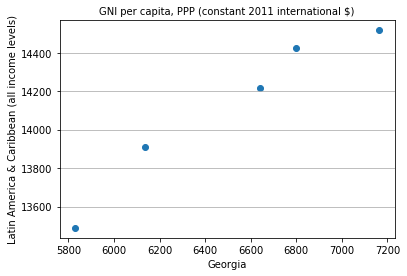

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)

## Example: Line Plot

Here we'll plot the indicator over time for each country.

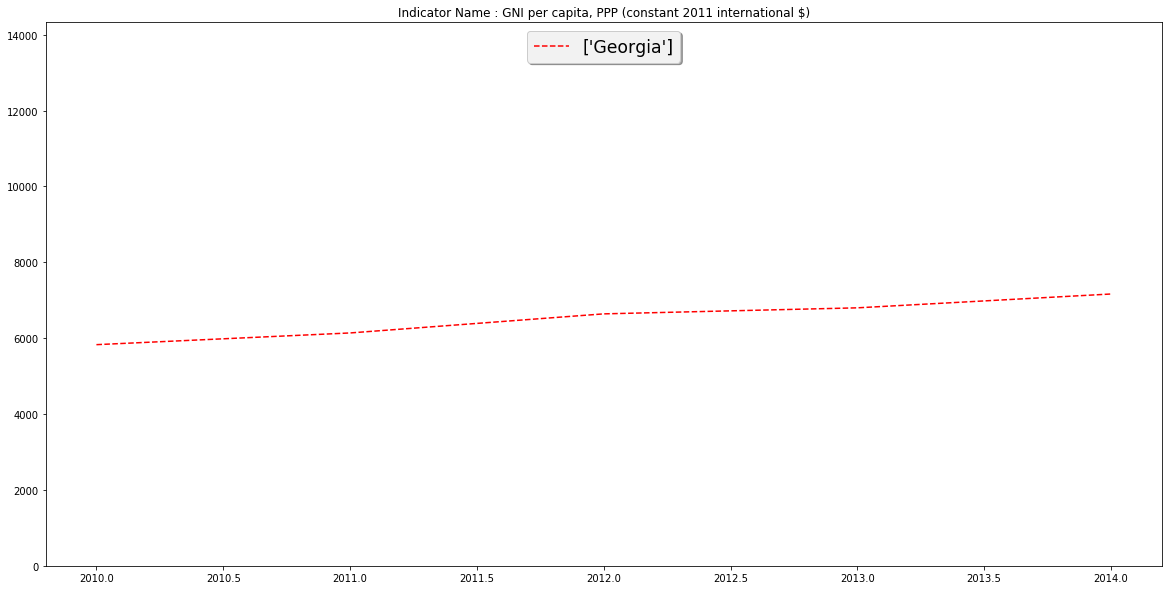

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

## Let's plot country #2

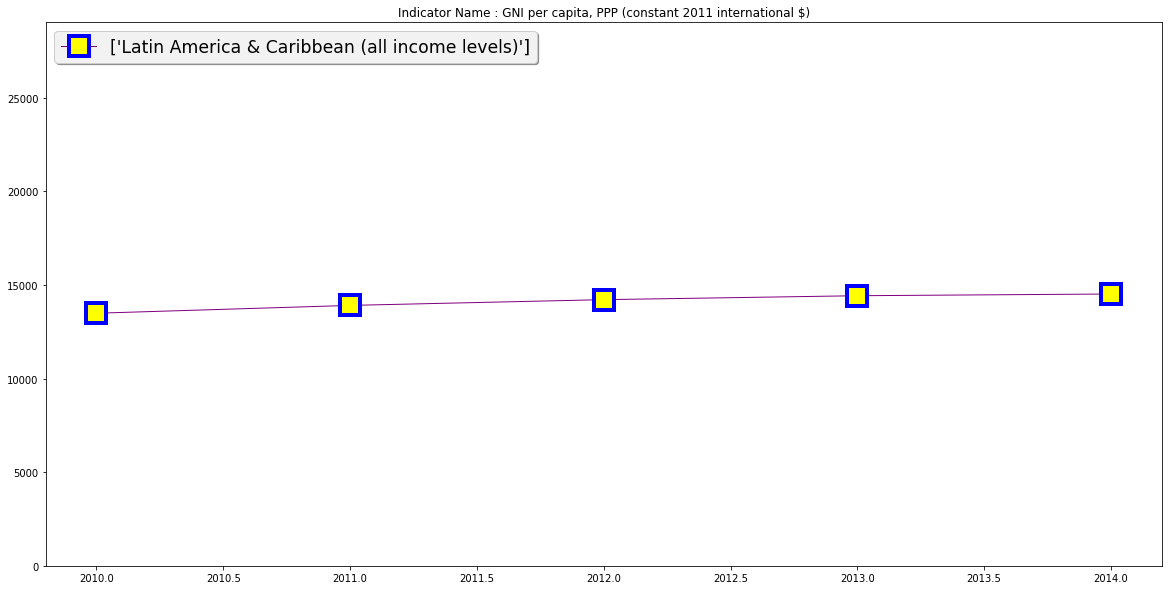

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

# Example (random datasets)

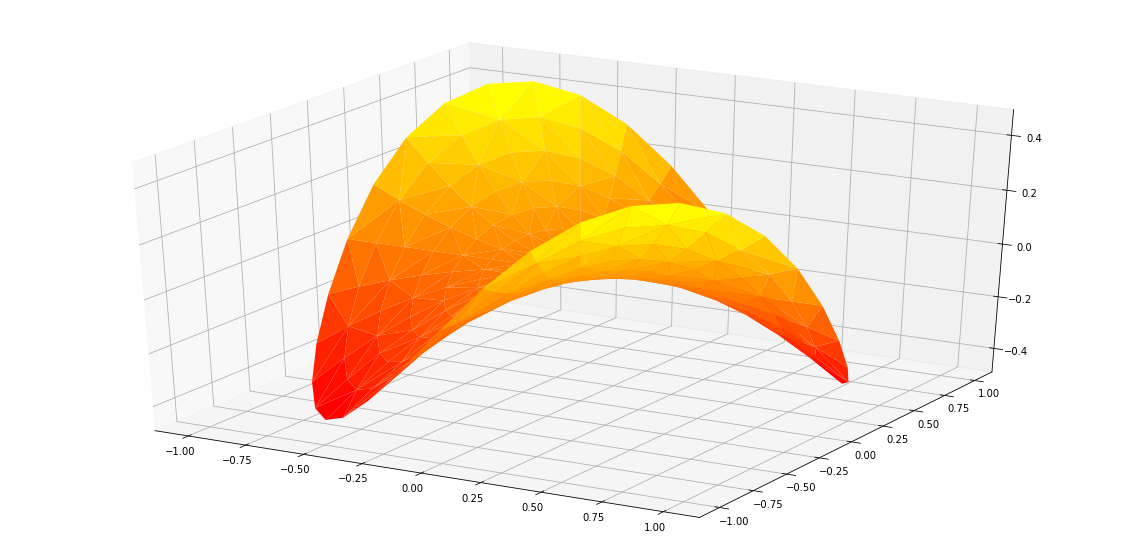

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()
fig.savefig("vis_3d.png")

# Example (random dataset)

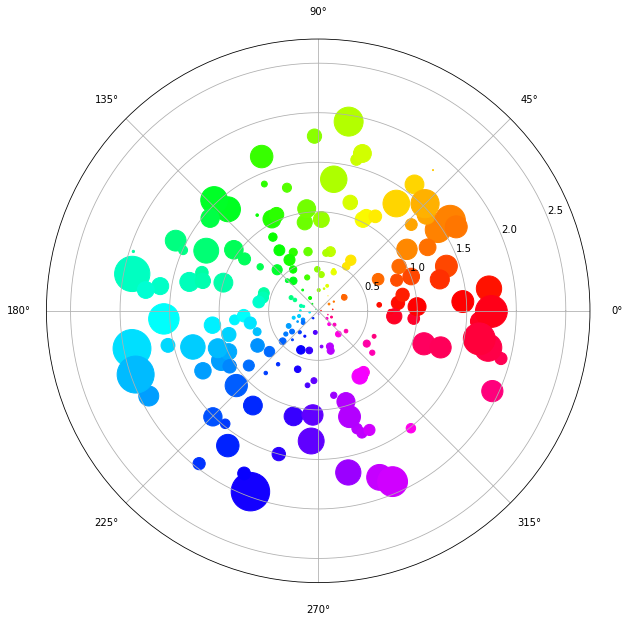

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()
fig.savefig("vis_bubbleplot.png")

# Example 4: Box Plots (random datasets)

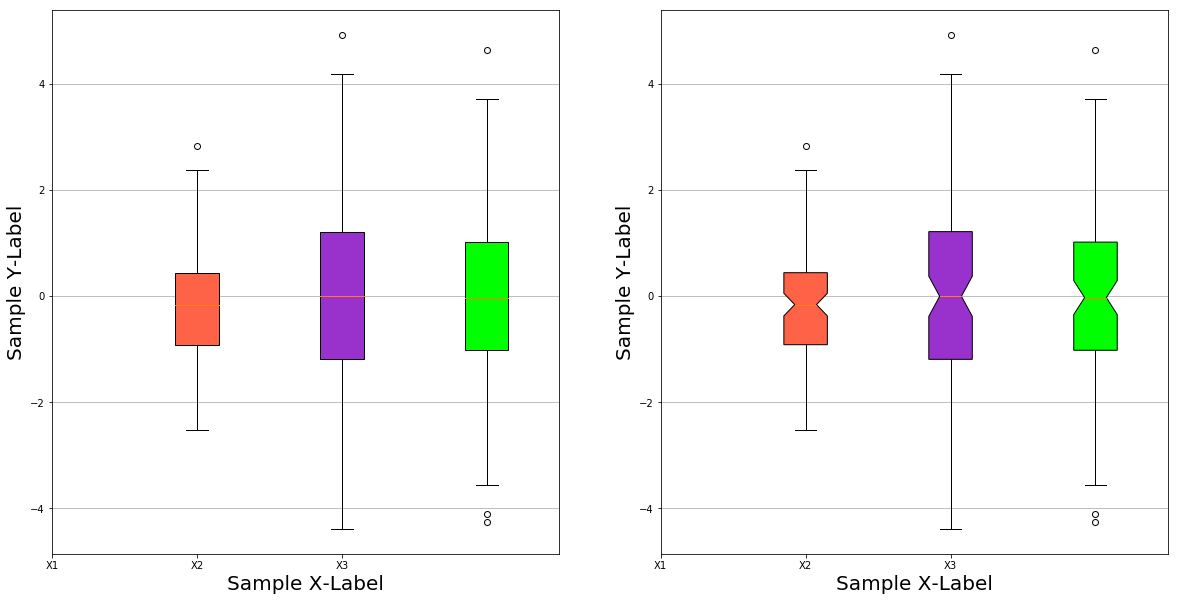

In [5]:
np.random.seed(452)

# Three ararys of 100 points each
A1 = np.random.normal(0, 1, 100)
A2 = np.random.normal(0, 2, 100)
A3 = np.random.normal(0, 1.5, 100)

# Concatenate the three arrays
data = [ A1, A2, A3 ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Box plot: Notch Shape
bplot1 = axes[1].boxplot(data,
                         notch=True,  
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color

# Box plot: Rectangular 
bplot2 = axes[0].boxplot(data,
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color




colors = ['tomato', 'darkorchid', 'lime']
# more colors here: http://matplotlib.org/examples/color/named_colors.html

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Grid lines, Xticks, Xlabel, Ylabel
for axis in axes:
    axis.yaxis.grid(True)
    axis.set_xticks([y for y in range(len(data))], )
    axis.set_xlabel('Sample X-Label',fontsize=20)
    axis.set_ylabel('Sample Y-Label',fontsize=20)

    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(data))],
         xticklabels=['X1', 'X2', 'X3'])

plt.show()
fig.savefig("vis_boxplot.png")

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html